# Отчет по лабораторной работе №5
# Решение систем линейных уравнений. Вариант 1.
## Выполнила: Гусев Юрий Сергеевич, группа 427
## Проверил: Шиндин А.В.

In [1]:
import scipy as sp
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import math
import pylab
from matplotlib import mlab

# Постановка задачи
Решить для n=10000 методом минимальной невязки систему уравнений с относительной точностью 0.001

$$ x_{1}=1 $$,
$$ x_{i-1}-(4+\frac{sin(2i))}{10=i})*x_{i}+x_{i+1}=\int_{0}^{1}\frac{cos(2t+1)}{1+it^2}dt,\;\;$$
$$i=\overline{2,n-1}$$
$$ x_{n}=1 $$

Для вычисления интеграла с относительной точностью 0.01 использовать формулу Симсона.

# Задание 2. Вычисление интеграла.
# Квадратурная формула Симпсона
Пусть подинтегральная функция $f(x)\epsilon C_{[\alpha,\beta]}^5$, тогда

\begin{equation}
\int_{a}^{b}f(x)dx=h/3(f(a)+4f(a+h)+2f(a+2h)+\dots+4f(a+(2N-1)h)+f(b))+R_N
\end{equation}



In [30]:
def f(t,p):
    n=np.sin(t)*np.exp(- p *t)
    return n


In [31]:
def simpson(a,b,p):
    fla=((b-a)/8)*(f(a, p) + 3*f((2*a+b)/3, p) + 3*f((a+2*b)/3, p) +f(b, p))
    return (fla) 

In [32]:
def rims(i):
    mas=[]
    it1=simpson(0,1,i)
    mas.append(it1)
    it2=simpson(0,0.5,i)+simpson(0.5,1,i)
    mas.append(it2)
    j=2
    while (abs(it1/it2-1)>0.01):
        j+=1
        it1=it2
        it2=0
        for k in range (j):
            it2+=simpson(k/j,(k+1)/j,i)
        mas.append(it2)
    #print (j)
    return (mas)
   
    #return (it2)

In [33]:
mas=rims(100)
print(mas)
print(len(mas))
dlina=len(mas)

[4.0959513873297029e-16, 1.7971992080102224e-09, 2.0715345613248076e-07, 1.8766126236476396e-06, 6.3746251443328252e-06, 1.3520405996437461e-05, 2.21768017506976e-05, 3.1225037326540987e-05, 3.9923167371199945e-05, 4.7885217676807934e-05, 5.4963706441081789e-05, 6.1146806737753261e-05, 6.6490722427750036e-05, 7.1080424727305643e-05, 7.5008532912879445e-05, 7.8364724416148891e-05, 8.1230943891913028e-05, 8.3679690451849797e-05, 8.577387551059529e-05, 8.7567432861881982e-05, 8.9106243662724312e-05, 9.0429147454905759e-05, 9.1568923956915441e-05, 9.2553192068419877e-05, 9.3405205748560378e-05]
25


In [34]:
int=[]
int.append(0)
i=1
while i<100:
    mas=rims(i)
    int.append(mas[len(mas)-1])
    i+=1
#print(int)

# Задание 3. Построение графика подынтегральной функции и графика зависимоти значение интеграла от номера итерации.

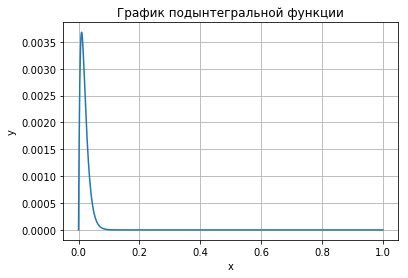

In [35]:
tlist = mlab.frange (0, 1, 0.001)
ylist = [f (t,100) for t in tlist]
plt.xlabel('x')    
plt.ylabel('y')    
plt.title('График подынтегральной функции')  
pylab.plot (tlist, ylist)
plt.grid(True)
pylab.show()

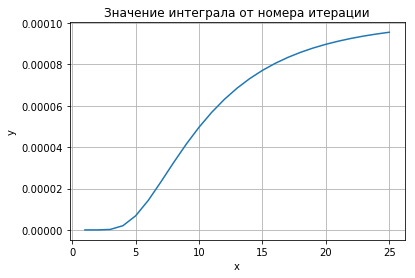

In [36]:
xlist = mlab.frange (1,dlina, 1)
ylist = mas
#plt.axis([-10, 10, -10,10])  
plt.xlabel('x')    
plt.ylabel('y')    
plt.title('Значение интеграла от номера итерации')  
pylab.plot (xlist, ylist)
plt.grid(True)
pylab.show()

# Задание 3+. Вычисление определенного интеграла через trapz() и сравнение результатов

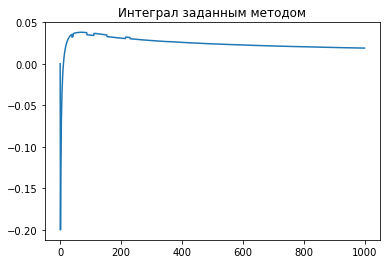

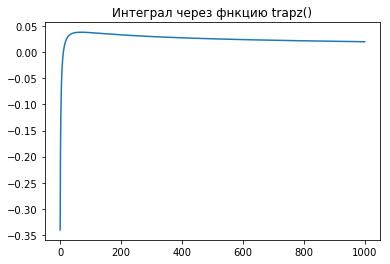

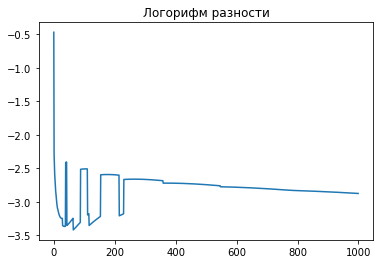

In [9]:
i=0
int10=zeros(1000)
while i<1000:
    x=0
    Im=[]
    while x<1:
        Im.append(integral(x,i))        

        x=x+0.01        
    int10[i]=trapz(Im,dx=0.01) 
    i=i+1

plt.plot(int)
plt.title('Интеграл заданным методом') 
plt.show()  


plt.plot(int10)
plt.title('Интеграл через фнкцию trapz()') 
plt.show()    


plt.plot(np.log10(abs(int-int10)))
plt.title('Логорифм разности') 
plt.show()

## Задание 4. Решение СЛУ методом минимальной невязки

Невязкой системы $Ax=f$ назовем $r^k=Ax^k-f,x^k\epsilon R_n$.Очевидно, что если $x^k=x^*$,то $r^k=0$.Рассмотрим явный нестационарный процесс 
$$ \frac{x^{k+1}-x^k}{\tau_k}+Ax^k=f,k \rightarrow \infty $$
$$ x^{k+1}=x^k-\tau_k(Ax^k-f)=x^k-\tau_k r^k|A \pm f $$
получим
$$ Ax^{k+1}-f=Ax^k-\tau_kAr^k $$
или
$$ r^{k+1}=f^k-\tau_kAr^k=(E-\tau_k A)r^k $$
Здесь $\tau_k$ выбирается из минимума скалярного произведения
$$(r^{k+1},r^{k+1})\rightarrow min_{\tau_k} $$

т.к.
$$(r^{k+1},r^{k+1})=(r^k-\tau_k Ar^k,r^k-\tau_k A r^k)= $$

$$(r^{k},r^{k})-2\tau_k(r^k,Ar^k)+{\tau^2}_k(Ar^k,Ar^k)$$

$$ \frac{\partial}{\partial\tau_k}(r^{k+1},r^{k+1})=0 \rightarrow \tau_k=\frac{(Ar^k,r^k)}{(Ar^k,Ar^k)}$$


In [10]:
n = 1000
i=1
j=1
buf = np.zeros((n, n))
buf1 = np.zeros((n, n))
flat = buf.ravel()
while (i<n-1) and (j<n-1):
    
    buf[i,j]=-(4+sin(2*i)/(10+i))
    j=j+1
    i=i+1
buf[0,0]=1
buf[n-1,n-1]=1
flat[n::n+1] = 1
flat[1::n+1] = 1
buf[0,1]=0
buf[n-1, n-2]=0

print(buf)
e=0.001
x=np.ones(n)*3
xp=np.ones(n)
x=np.array(int)-1
x[0]=1.
x[-1]=0.
rp=np.dot(xp,buf)-int+1
rpp=np.dot(rp,buf)*rp
rp2=(np.dot(rp,buf))*(np.dot(rp,buf))
i=0
ch=0
zn=0
while i<n:
    ch=ch+rpp[i]
    zn=zn+rp2[i]
    i=i+1
tau=ch/zn 
#print(tau)
iter=0
while (abs((xp[500]-x[500])/x[500])>e):
    i=0
    xp=x
    rp=np.dot(xp,buf)-int+1
    rpp=np.dot(rp,buf)*rp
    rp2=(np.dot(rp,buf))*(np.dot(rp,buf))
    ch=0
    zn=0
    while i<n:
        ch=ch+rpp[i]
        zn=zn+rp2[i]
        i=i+1
    tau=ch/zn 
    iter=iter+1
#print(xp)
#print(rp)
#print(rpp)
#print(ch,zn,tau)
    x=xp-tau*rp

x[0]=1
x[n-1]=0
#print(x)
print(iter)    

[[ 1.          0.          0.         ...,  0.          0.          0.        ]
 [ 1.         -4.0826634   1.         ...,  0.          0.          0.        ]
 [ 0.          1.         -3.93693313 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ..., -4.00078483  1.          0.        ]
 [ 0.          0.          0.         ...,  1.         -3.99912102  1.        ]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]
33


# Задание 5. Построение графика решения X(i) и графика зависимости нормы решения от номера итерации

[[  1.39738737e+00   1.26686197e+00   5.05630926e-01 ...,   4.81275027e-01
    9.67844903e-01   3.33314579e-06]
 [  2.18541926e+00   5.21337105e-01   7.04795713e-01 ...,   5.89791239e-01
    4.49975594e-01   4.19171977e-01]
 [  2.94275326e-01   6.35468862e-01   1.00204404e+00 ...,   8.16004419e-01
    5.66548025e-01  -5.24870808e-01]
 ..., 
 [ -1.30425514e+00   4.30044927e-01   5.39627890e-01 ...,   4.60933635e-01
    3.63889931e-01  -1.28204469e+00]
 [ -1.27632601e+00   4.26457423e-01   5.37489653e-01 ...,   4.59101159e-01
    3.60985859e-01  -1.26803934e+00]
 [ -1.30555574e+00   4.27167940e-01   5.39920176e-01 ...,   4.61042031e-01
    3.61628032e-01  -1.28248174e+00]]
[15.235226388747868, 15.40633058550941, 15.111010973569975, 15.220077672103507, 15.11502844308527, 15.242413124897702, 15.097188668277573, 15.276256600817606, 15.227286151000477, 15.273591126844559, 15.205472343051918, 15.281272151155745, 15.211736006240484, 15.315151985025329, 15.242121029788196, 15.361102440818634, 1

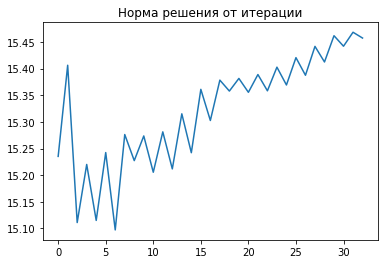

In [11]:
xit=np.ones(n)*3
xpit=np.ones(n)
xit=np.array(int)-1
xit[0]=1.
xit[-1]=0.
xter=np.zeros((33,n))
iter=0
xx=np.zeros((33,n))
while (abs((xit[500]-xpit[500])/xit[500])>e):
    i=0
    xpit=xit
    rp=np.dot(xpit,buf)-int+1
    rpp=np.dot(rp,buf)*rp
    rp2=(np.dot(rp,buf))*(np.dot(rp,buf))
    ch=0
    zn=0
    while i<n:
        ch=ch+rpp[i]
        zn=zn+rp2[i]
        i=i+1
    tau=ch/zn
    xit=xpit-tau*rp
    xter[iter,:] = xit
    iter=iter+1
    
print(xter) 
nor=[]
iter=0
while iter<33:
    xx[iter, :]=xter[iter,:]*xter[iter,:]
    i=0
    xv=0
    while i<n:
        xv=xv+xx[iter, i]
        i=i+1 
    nor.append(sqrt(xv))
    iter=iter+1
print(nor)   
plt.plot(nor)
plt.title('Норма решения от итерации') 
plt.show()

# Задание 5+. Решение системы через linalg.solve() и графическое сравнение результатов.

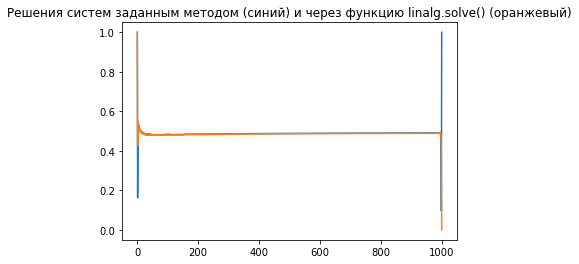

C:\Users\Yuri\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log10


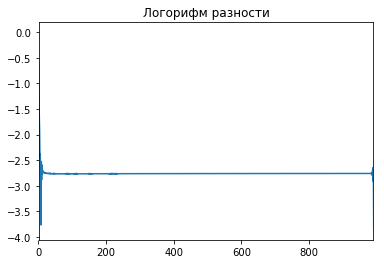

In [12]:
f=np.zeros(1000)
f1=np.ones(1000)*(-1)
f=f1+int
x3=np.linalg.solve(buf, f)
x3[0]=1
x3[999]=1
#print(x)

plt.plot(x3)
plt.plot(x)
plt.title('Решения систем заданным методом (синий) и через функцию linalg.solve() (оранжевый)') 
plt.show()
plt.plot(np.log10(abs(x3-x)))
plt.xlim(1,990)
plt.title('Логорифм разности') 
plt.show()

# Решение системы для 10000 уравнений

In [13]:
int=[]
int.append(0)
i=1
while i<10000:
    mas1=rims(i)
    int.append(mas1[len(mas1)-1])
    i+=1

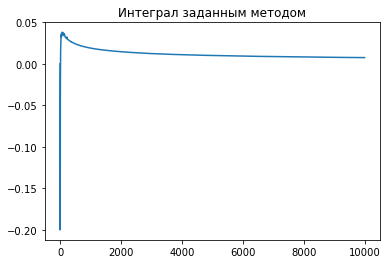

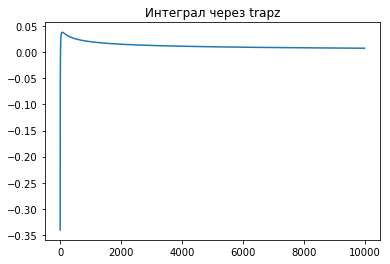

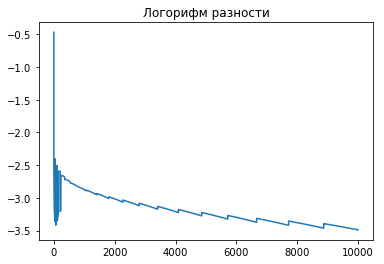

In [14]:
i=0
int10=zeros(10000)
while i<10000:
    x=0
    Im=[]
    while x<1:
        Im.append(integral(x,i))        

        x=x+0.01        
    int10[i]=trapz(Im,dx=0.01) 
    i=i+1

plt.plot(int)
plt.title('Интеграл заданным методом') 
plt.show()   
plt.plot(int10)
plt.title('Интеграл через trapz') 
plt.show() 
plt.plot(np.log10(abs(int-int10)))
plt.title('Логорифм разности') 
plt.show() 

In [15]:
n = 10000
i=1
j=1
buf = np.zeros((n, n))
buf1 = np.zeros((n, n))
flat = buf.ravel()
while (i<n-1) and (j<n-1):
    
    buf[i,j]=-(4+sin(2*i)/(10+i))
    j=j+1
    i=i+1
buf[0,0]=1
buf[n-1,n-1]=1
flat[n::n+1] = 1
flat[1::n+1] = 1
buf[0,1]=0
buf[n-1, n-2]=0

print(buf)
e=0.001
x=np.ones(n)*3
xp=np.ones(n)
x=np.array(int)-1
x[0]=1.
x[-1]=0.
rp=np.dot(xp,buf)-int+1
rpp=np.dot(rp,buf)*rp
rp2=(np.dot(rp,buf))*(np.dot(rp,buf))
i=0
ch=0
zn=0
while i<n:
    ch=ch+rpp[i]
    zn=zn+rp2[i]
    i=i+1
tau=ch/zn 
#print(tau)
iter=0
while (abs((xp[5000]-x[5000])/x[5000])>e):
    i=0
    xp=x
    rp=np.dot(xp,buf)-int+1
    rpp=np.dot(rp,buf)*rp
    rp2=(np.dot(rp,buf))*(np.dot(rp,buf))
    ch=0
    zn=0
    while i<n:
        ch=ch+rpp[i]
        zn=zn+rp2[i]
        i=i+1
    tau=ch/zn 
    iter=iter+1
#print(xp)
#print(rp)
#print(rpp)
#print(ch,zn,tau)
    x=xp-tau*rp

x[0]=1
x[n-1]=0
#print(x)
print(iter)    

[[ 1.          0.          0.         ...,  0.          0.          0.        ]
 [ 1.         -4.0826634   1.         ...,  0.          0.          0.        ]
 [ 0.          1.         -3.93693313 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ..., -4.00007855  1.          0.        ]
 [ 0.          0.          0.         ...,  1.         -4.00002348  1.        ]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]
2


[[  1.39976677e+00   1.28163227e+00   5.15439484e-01 ...,   4.95394896e-01
    9.91373300e-01   1.33706129e-07]
 [  2.19091593e+00   5.25793737e-01   7.11408483e-01 ...,   6.02358559e-01
    4.58955764e-01   4.26377927e-01]]
[49.352328940132168, 49.406406530384558]


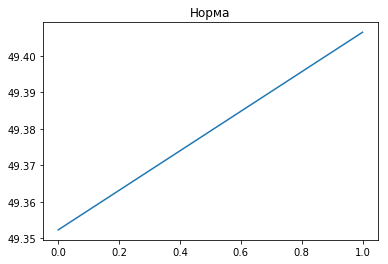

In [16]:
xit=np.ones(n)*3
xpit=np.ones(n)
xit=np.array(int)-1
xit[0]=1.
xit[-1]=0.
xter=np.zeros((2,n))
iter=0
xx=np.zeros((2,n))
while (abs((xit[5000]-xpit[5000])/xit[5000])>e):
    i=0
    xpit=xit
    rp=np.dot(xpit,buf)-int+1
    rpp=np.dot(rp,buf)*rp
    rp2=(np.dot(rp,buf))*(np.dot(rp,buf))
    ch=0
    zn=0
    while i<n:
        ch=ch+rpp[i]
        zn=zn+rp2[i]
        i=i+1
    tau=ch/zn
    xit=xpit-tau*rp
    xter[iter,:] = xit
    iter=iter+1
    
print(xter) 
nor=[]
iter=0
while iter<2:
    xx[iter, :]=xter[iter,:]*xter[iter,:]
    i=0
    xv=0
    while i<n:
        xv=xv+xx[iter, i]
        i=i+1 
    nor.append(sqrt(xv))
    iter=iter+1
print(nor)   
plt.plot(nor)
plt.title('Норма') 
plt.show()

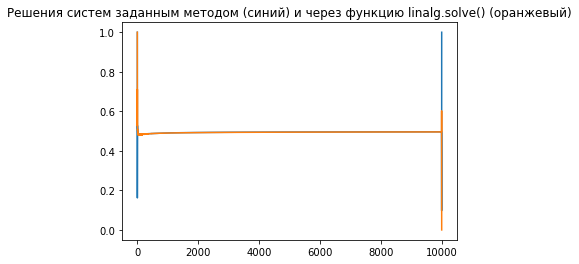

C:\Users\Yuri\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log10


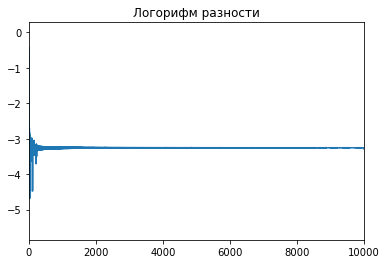

In [17]:
f=np.zeros(10000)
f1=np.ones(10000)*(-1)
f=f1+int
x3=np.linalg.solve(buf, f)
x3[0]=1
x3[9999]=1
#print(x)

plt.plot(x3)
plt.plot(x)
plt.title('Решения систем заданным методом (синий) и через функцию linalg.solve() (оранжевый)') 
plt.show()
plt.plot(np.log10(abs(x3-x)))
plt.xlim(1,9990)
plt.title('Логорифм разности') 
plt.show()